In [1]:
# LOAD LIBRARIES
import pandas as pd, numpy as np # CPU libraries
import matplotlib.pyplot as plt, gc, os
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.head(2)

/tmp/ipykernel_213/184982313.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2260701, 151)

In [4]:
# Tranform issue_d into datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')


In [5]:
# Filter only data from 2015 to 2018
df = df[(df["issue_d"] >= '2015-01-01')]

In [6]:
keep_list = ['loan_amnt',
              'funded_amnt',
              'term',
              'int_rate',
              'grade',
              'emp_title', 
              'emp_length',
              'home_ownership',
              'annual_inc',
              'verification_status',
              'issue_d',
              'loan_status',
              'purpose',
              'zip_code',
              'dti',
              'delinq_2yrs',
              'earliest_cr_line',
              'open_acc',
              'pub_rec',
              'fico_range_high',
              'fico_range_low',
              'revol_bal',
              'revol_util',
    
]

drop_list = [col for col in df.columns if col not in keep_list]
df.drop(labels=drop_list, axis=1, inplace=True)

In [7]:
df.shape

(1794323, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794323 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   loan_amnt            float64       
 1   funded_amnt          float64       
 2   term                 object        
 3   int_rate             float64       
 4   grade                object        
 5   emp_title            object        
 6   emp_length           object        
 7   home_ownership       object        
 8   annual_inc           float64       
 9   verification_status  object        
 10  issue_d              datetime64[ns]
 11  loan_status          object        
 12  purpose              object        
 13  zip_code             object        
 14  dti                  float64       
 15  delinq_2yrs          float64       
 16  earliest_cr_line     object        
 17  fico_range_low       float64       
 18  fico_range_high      float64       
 19  open_acc             float

In [9]:
df.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util
count,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1794323,1.792612e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.792861e+06
mean,1.523661e+04,1.523659e+04,1.290164e+01,7.921845e+04,2017-01-13 07:09:30.300665856,1.924170e+01,3.126488e-01,6.992316e+02,7.032319e+02,1.172297e+01,2.071322e-01,1.676983e+04,4.881974e+01
min,1.000000e+03,1.000000e+03,5.310000e+00,0.000000e+00,2015-01-01 00:00:00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.430000e+00,4.700000e+04,2016-01-01 00:00:00,1.205000e+01,0.000000e+00,6.750000e+02,6.790000e+02,8.000000e+00,0.000000e+00,5.831000e+03,2.980000e+01
50%,1.300000e+04,1.300000e+04,1.229000e+01,6.500000e+04,2017-02-01 00:00:00,1.812000e+01,0.000000e+00,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,1.120700e+04,4.830000e+01
75%,2.000000e+04,2.000000e+04,1.561000e+01,9.500000e+04,2018-02-01 00:00:00,2.499000e+01,0.000000e+00,7.150000e+02,7.190000e+02,1.500000e+01,0.000000e+00,2.022100e+04,6.760000e+01
max,4.000000e+04,4.000000e+04,3.099000e+01,1.100000e+08,2018-12-01 00:00:00,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,1.010000e+02,8.600000e+01,2.904836e+06,1.930000e+02
std,9.401695e+03,9.401696e+03,4.930004e+00,1.233243e+05,NaN,1.538244e+01,8.843963e-01,3.353838e+01,3.353937e+01,5.793524e+00,5.846403e-01,2.350181e+04,2.473695e+01


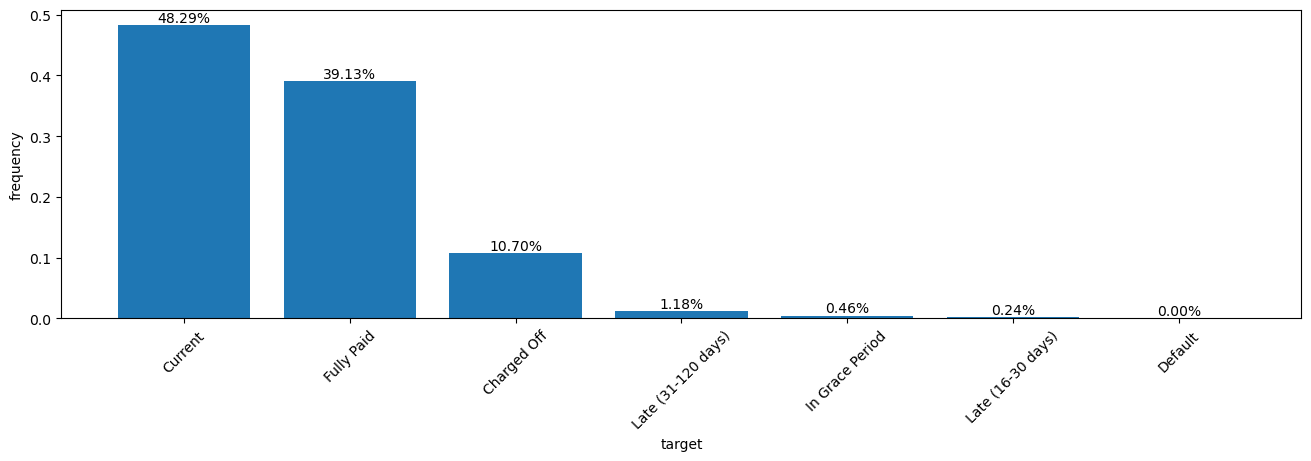

In [10]:
# Loan status distribution

temp = df['loan_status'].value_counts(normalize=True)
plt.figure(figsize=(16, 4))
plt.bar(temp.index, temp.values)
plt.xlabel('target')
plt.ylabel('frequency')

# Rotate the x-ticks by 45 degrees
plt.xticks(rotation=45)

# Add percentage labels on bars
for i, value in enumerate(temp.values):
    plt.text(temp.index[i], value, f"{value:.2%}", ha='center', va='bottom')

We take fully paid and charged off only

In [11]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [12]:
df.shape

(894251, 23)

Create target variable named 'default' and drop loan_status

In [13]:
df['default'] = df['loan_status'].apply(lambda x: int(0) if x == 'Fully Paid' else int(1))

In [14]:
df = df.drop(columns=['loan_status'])

Remove all variables have only 1 value

In [15]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", constant_features)

df = df.drop(columns=constant_features)

Columns with only one unique value: []


Remove funded_amnt and fico_range_high for Multicollinearity elimination

In [16]:
df = df.drop(columns=['funded_amnt','fico_range_high'])

In [17]:
df.shape

(894251, 21)

# Missing Value

### 1. Drop missing variables > 50%

In [18]:
missing_cols = df.columns[df.isnull().mean() > 0.5]

In [19]:
print(missing_cols)

Index([], dtype='object')


Drop variables

In [20]:
df = df.drop(columns=missing_cols)

In [21]:
df.shape

(894251, 21)

### 2. Fill remaining null variables with suitable values

In [22]:
missing_cols = df.columns[df.isnull().mean() > 0]

In [23]:
print(missing_cols)

Index(['emp_title', 'emp_length', 'zip_code', 'dti', 'revol_util'], dtype='object')


In [24]:
df[missing_cols].isnull().sum()

emp_title     58825
emp_length    57992
zip_code          1
dti             374
revol_util      567
dtype: int64

In [25]:
df[missing_cols].isnull().mean()

emp_title     0.065781
emp_length    0.064850
zip_code      0.000001
dti           0.000418
revol_util    0.000634
dtype: float64

In [26]:
# Fill with median
variables = ['dti', 'revol_util']

for variable in variables:
    df[variable].fillna(df[variable].median(), inplace=True) 

/tmp/ipykernel_213/2252016898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(df[variable].median(), inplace=True)
/tmp/ipykernel_213/2252016898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [27]:
# Fill with mode
variables = ['emp_title', 'emp_length', 'zip_code']
for variable in variables:
    df[variable].fillna(df[variable].mode()[0], inplace=True)


/tmp/ipykernel_213/3256916007.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(df[variable].mode()[0], inplace=True)


In [28]:
df[missing_cols].isnull().sum()

emp_title     0
emp_length    0
zip_code      0
dti           0
revol_util    0
dtype: int64

In [29]:
df.shape

(894251, 21)

# Remove outliers

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894251 entries, 0 to 2260697
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_amnt            894251 non-null  float64       
 1   term                 894251 non-null  object        
 2   int_rate             894251 non-null  float64       
 3   grade                894251 non-null  object        
 4   emp_title            894251 non-null  object        
 5   emp_length           894251 non-null  object        
 6   home_ownership       894251 non-null  object        
 7   annual_inc           894251 non-null  float64       
 8   verification_status  894251 non-null  object        
 9   issue_d              894251 non-null  datetime64[ns]
 10  purpose              894251 non-null  object        
 11  zip_code             894251 non-null  object        
 12  dti                  894251 non-null  float64       
 13  delinq_2yrs       

Get all number columns and plot to check if there are outliers

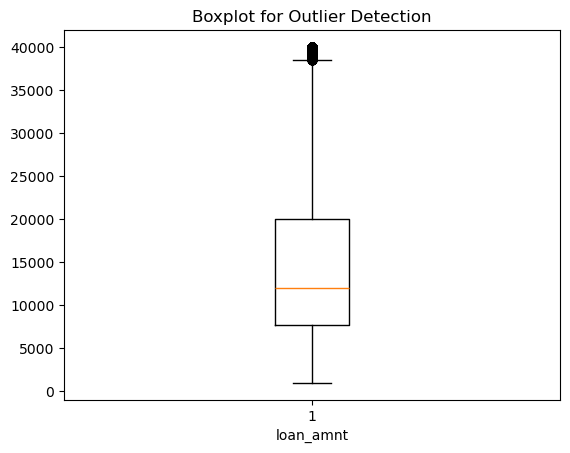

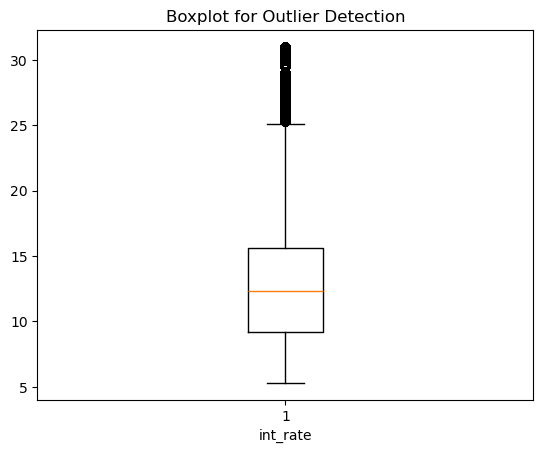

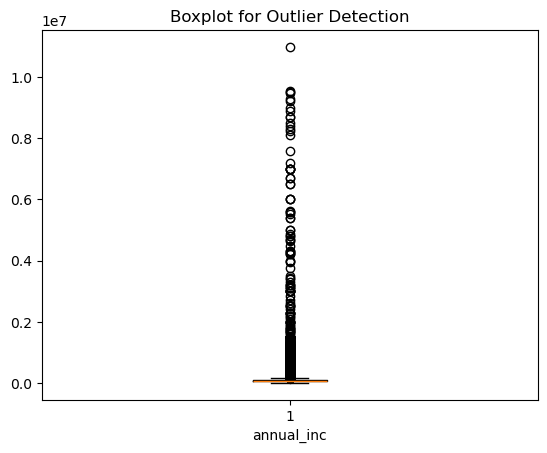

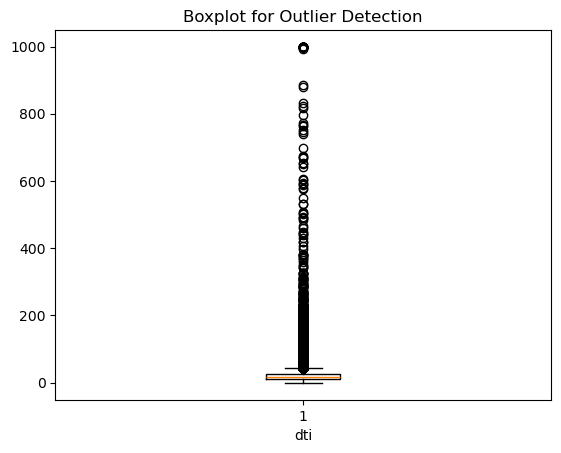

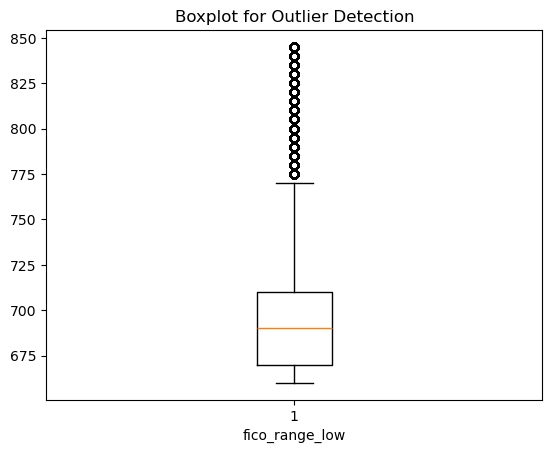

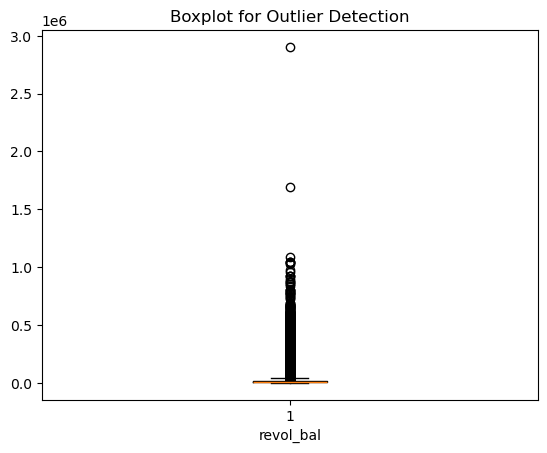

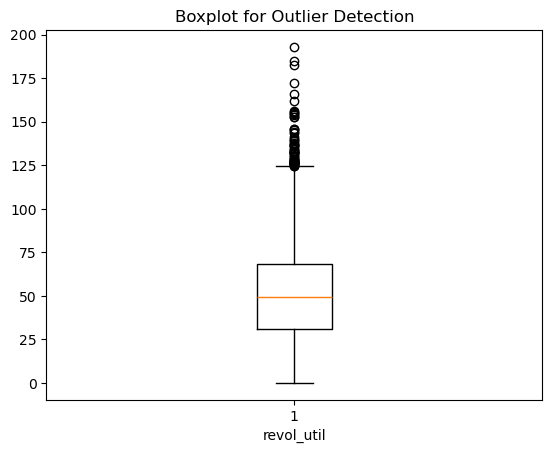

In [31]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop(['default',
                         'delinq_2yrs',
                         'open_acc',
                         'pub_rec',
                         ]
                        )

for col in num_cols:
    plt.boxplot(df[col])
    plt.title("Boxplot for Outlier Detection")
    plt.xlabel(col)
    plt.show()

In [32]:
# Fill outliers with upper and lower bound using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers: Lower ones with Q1, upper ones with Q3
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

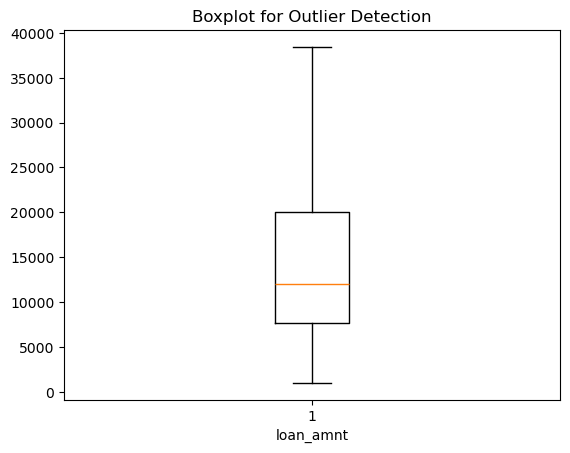

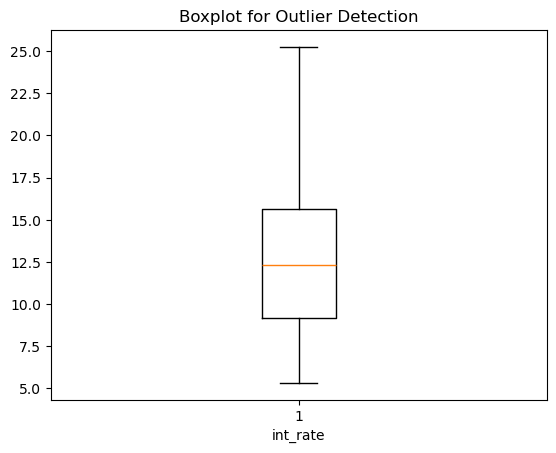

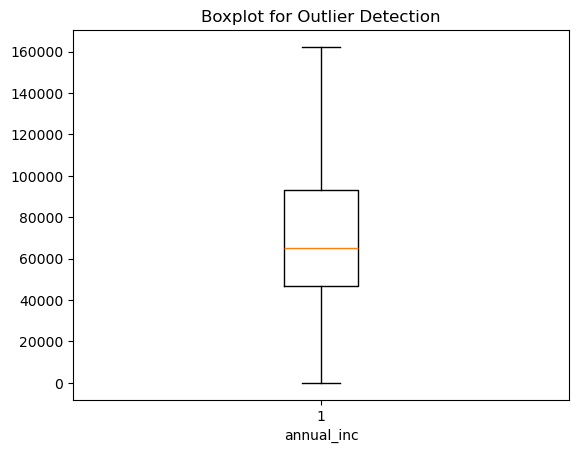

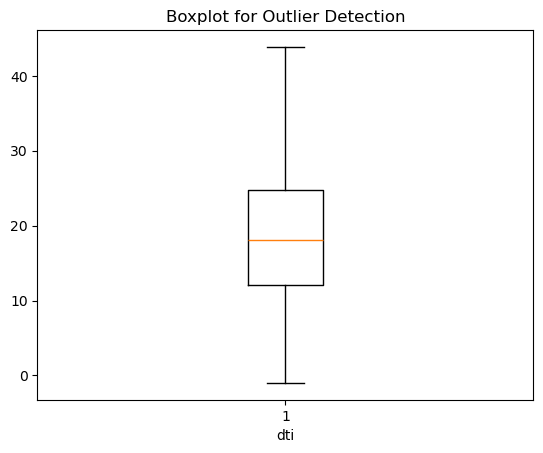

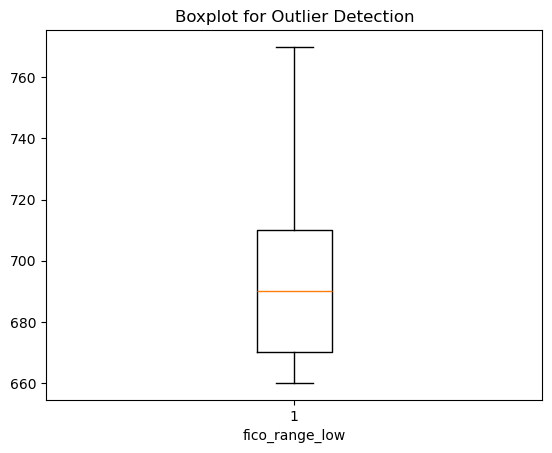

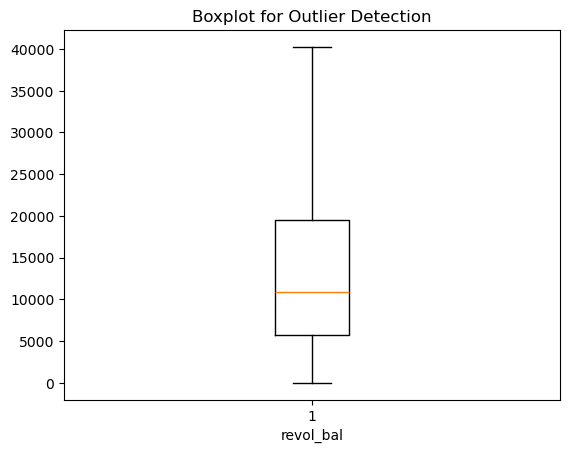

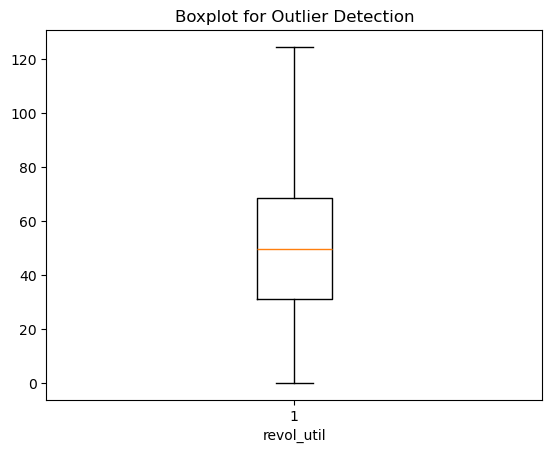

In [33]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop(['default',
                         'delinq_2yrs',
                         'open_acc',
                         'pub_rec',
                         ]
                        )

for col in num_cols:
    plt.boxplot(df[col])
    plt.title("Boxplot for Outlier Detection")
    plt.xlabel(col)
    plt.show()

## Data Transformation

### Date Variables

In [34]:
# Extract month and year from earliest_cr_line
df[['earliest_cr_line_month', 'earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand=True)

### Categorical Variables

In [35]:
df.select_dtypes(include=['object']).head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,purpose,zip_code,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
0,36 months,C,leadman,10+ years,MORTGAGE,Not Verified,debt_consolidation,190xx,Aug-2003,Aug,2003
1,36 months,C,Engineer,10+ years,MORTGAGE,Not Verified,small_business,577xx,Dec-1999,Dec,1999
2,60 months,B,truck driver,10+ years,MORTGAGE,Not Verified,home_improvement,605xx,Aug-2000,Aug,2000
4,60 months,F,Contract Specialist,3 years,MORTGAGE,Source Verified,major_purchase,174xx,Jun-1998,Jun,1998
5,36 months,C,Veterinary Tecnician,4 years,RENT,Source Verified,debt_consolidation,300xx,Oct-1987,Oct,1987


In [36]:
# zipcode >= 5000
counts = df['zip_code'].value_counts()  # Count occurrences of each category
df['zip_code'] = df['zip_code'].where(df['zip_code'].isin(counts[counts >= 5000].index), 'Other')
print(df['zip_code'].value_counts())  # Check updated category distribution

zip_code
Other    756442
945xx      9816
750xx      9587
112xx      8860
300xx      8161
606xx      7903
331xx      7444
891xx      7360
770xx      7012
070xx      6842
330xx      6761
900xx      6582
100xx      6362
104xx      6287
917xx      6158
117xx      6102
852xx      5791
925xx      5428
921xx      5229
913xx      5106
926xx      5018
Name: count, dtype: int64


In [37]:
# List cardinality
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['term',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'zip_code',
 'earliest_cr_line',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

In [38]:
onehotencoding_list = []
other = []

for variable in categorical_variables:
    if df[variable].nunique() <= 10:
        onehotencoding_list.append(variable)
    else:
        other.append(variable)

print(f'onehot: {onehotencoding_list}')
print(f'other: {other}')

onehot: ['term', 'grade', 'home_ownership', 'verification_status']
other: ['emp_title', 'emp_length', 'purpose', 'zip_code', 'earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year']


#### Encoding Categorical Variables

In [39]:
onehotencoding_list = ['term', 
                       'grade', 
                       'home_ownership', 
                       'verification_status', 
                       'earliest_cr_line_month',
                       'earliest_cr_line_year'
                      ]

other = ['emp_title',
         'zip_code', 
        'delinq_2yrs',
        'emp_length',
        'purpose',]

OneHotEncoder

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop(columns=['default'])  # Features
y = df['default']  # Target

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(X[onehotencoding_list])

# Create DataFrame with encoded values
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehotencoding_list))

# Drop original categorical columns and concatenate encoded data
df = pd.concat([df.drop(columns=onehotencoding_list).reset_index(drop=True), encoded_df], axis=1)

# Ensure target is present
df['default'] = y.values  

# Fix column names after one-hot encoding
df.columns = df.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

Frequency encoding

In [41]:
# Frequency encoding
for variable in other:
    df[variable] = df[variable].map(df[variable].value_counts())

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

# Variables scaling
scaler = StandardScaler()

cols_to_scale = ['loan_amnt',
                 'int_rate',
                 'annual_inc',
                 'dti',
                 'delinq_2yrs',
                 'fico_range_low',
                 'open_acc',
                 'pub_rec',
                 'revol_bal',
                 'revol_util',
                 'emp_title',
                 'zip_code',
                 'emp_length',
                 'purpose'
                ]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

### Train test split

In [43]:
# Split train dataset and test dataset based on issue date

X_test = df[df['issue_d'] >= '2018-01-01'].drop(columns=['default']).reset_index(drop=True)
y_test = df[df['issue_d'] >= '2018-01-01']['default'].reset_index(drop=True)

X_train = df[(df["issue_d"] >= '2015-01-01') & (df["issue_d"] <= '2017-12-31')].drop(columns=['default'])
y_train = df[(df["issue_d"] >= '2015-01-01') & (df["issue_d"] <= '2017-12-31')]['default']

In [44]:
# Reclaim memory
gc.collect()

29

In [45]:
# Drop issue_d and earliest_cr_line
date_variables= ['issue_d', 'earliest_cr_line']
X_test = X_test.drop(columns=date_variables)
X_train = X_train.drop(columns=date_variables)

# Machine learning

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, matthews_corrcoef
from imblearn.metrics import geometric_mean_score  # G-Mean (for imbalanced data)
from sklearn.model_selection import KFold, cross_val_score

First, use K-Fold validation on training dataset

In [47]:
from sklearn.metrics import confusion_matrix

# Model
model = xgb.XGBClassifier(
    objective='binary:logistic'  # Binary classification
)

# Initialize K-Fold (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # print (tn / (tn + fp))
    return tn / (tn + fp)  # True Negative Rate

# Perform cross-validation and get scores
scoring = {
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'f1': make_scorer(f1_score),
    'gmean': make_scorer(geometric_mean_score),
    'mcc': make_scorer(matthews_corrcoef)
}

cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=False)

# Print results
for metric in scoring.keys():
    print(f"{metric}: Mean = {np.mean(cv_results[f'test_{metric}'])}, Std = {np.std(cv_results[f'test_{metric}'])}")

recall: Mean = 0.13098634941814438, Std = 0.0015012788974142358
specificity: Mean = 0.9715424978291278, Std = 0.0007499055419615568
f1: Mean = 0.21251246909972493, Std = 0.0017970531980183487
gmean: Mean = 0.3567270545360454, Std = 0.0019387969950371098
mcc: Mean = 0.19285842682129517, Std = 0.0016957831040553895


The result shows that the model prediction is stable. We can use all train dataset for the training phase.

In [48]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
# Predict class labels (0 or 1)
y_test_pred = model.predict(X_test)

# Predict probabilities for each class
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [50]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, matthews_corrcoef

def evaluate_model(y_true, y_prob, threshold):
    """
    Evaluates the model using various performance metrics after applying the optimal threshold.

    Parameters:
    - y_true: Ground truth labels (0 or 1)
    - y_prob: Predicted probabilities
    - threshold: Optimal threshold for classification

    Returns:
    - A dictionary containing evaluation metrics: MCC, Specificity, Recall, G-Mean, and F1-Score.
    """
    # Apply threshold to get final predictions
    y_pred = (y_prob >= threshold).astype(int)

    # Compute Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Compute Metrics
    recall = recall_score(y_true, y_pred)  # Sensitivity / TPR
    specificity = tn / (tn + fp)  # True Negative Rate / TNR
    f1 = f1_score(y_true, y_pred)  # F-Measure
    g_mean = np.sqrt(recall * specificity)  # Geometric Mean
    mcc = matthews_corrcoef(y_true, y_pred)  # Matthews Correlation Coefficient

    # Output
    print("Recall (Sensitivity)", recall)
    print("Specificity (TNR)", specificity)
    print("F1-Score", f1)
    print("G-Mean", g_mean)
    print("MCC", mcc)

The result with no rebalance techique used

In [51]:
print("None:")
evaluate_model(y_test, y_test_pred_proba, 0.5)

None:
Recall (Sensitivity) 0.13251381527010261
Specificity (TNR) 0.9665500379394655
F1-Score 0.20208100438558776
G-Mean 0.3578843852095548
MCC 0.16707316489807678


In [52]:
# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for better display
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                        Feature  Importance
1                      int_rate    0.211621
14              term_ 60 months    0.070522
24          home_ownership_RENT    0.067459
21      home_ownership_MORTGAGE    0.045189
17                      grade_D    0.030574
..                          ...         ...
45   earliest_cr_line_year_1954    0.000000
44   earliest_cr_line_year_1953    0.000000
52   earliest_cr_line_year_1961    0.000000
49   earliest_cr_line_year_1958    0.000000
106  earliest_cr_line_year_2015    0.000000

[107 rows x 2 columns]


### Threshold Optimization

#### Mathew Correlation

In [53]:
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import roc_curve

def best_threshold_mcc(y_true, y_prob, c=False):
    """Finds the best classification threshold using MCC."""
    fprs, tprs, thresholds = roc_curve(y_true, y_prob)
    tnrs = 1 - fprs
    mcc_scores = []

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
        mcc_scores.append(matthews_corrcoef(y_true, y_pred))

    mcc_scores = np.array(mcc_scores)

    # Apply constraint: Only consider thresholds where TPR >= TNR
    if c:
        mask = tprs >= tnrs
        mcc_scores = mcc_scores[mask]
        thresholds = thresholds[mask]

    # Find the best MCC threshold
    best_idx = np.argmax(mcc_scores)  # Get index of max MCC
    return thresholds[best_idx], mcc_scores[best_idx]

MCC with no constraint

In [54]:
best_thresh, best_mcc = best_threshold_mcc(y_test, y_test_pred_proba)
print("Best Threshold:", best_thresh)
print("Best MCC Score:", best_mcc)

Best Threshold: 0.28993934
Best MCC Score: 0.23425344081169622


In [55]:
print("Mathew correlation:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

Mathew correlation:
Recall (Sensitivity) 0.5324235930980038
Specificity (TNR) 0.7585785346935334
F1-Score 0.377046561776216
G-Mean 0.6355195583839649
MCC 0.23425344081169622


MCC with constraint

In [56]:
best_thresh, best_mcc = best_threshold_mcc(y_test, y_test_pred_proba, True)
print("Best Threshold:", best_thresh)
print("Best MCC Score:", best_mcc)

Best Threshold: 0.2331149
Best MCC Score: 0.22951532491888263


In [57]:
print("Mathew correlation with constrain:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

Mathew correlation with constrain:
Recall (Sensitivity) 0.6554640802977332
Specificity (TNR) 0.6526852710564034
F1-Score 0.3730782809641493
G-Mean 0.6540731999683691
MCC 0.22951532491888263


#### G-mean

In [58]:
from sklearn.metrics import roc_curve

def best_threshold_gmean(y_true, y_prob, c=False):
    """
    Find the best classification threshold using Geometric Mean (G-Mean).
    If c=True, only consider thresholds where TPR >= TNR.
    
    Parameters:
    - y_true: Ground truth labels (binary: 0 or 1)
    - y_prob: Predicted probabilities
    - c: Constraint flag (default=False). If True, only use thresholds where TPR >= TNR.
    
    Returns:
    - optimal_threshold: Best threshold maximizing G-Mean
    - best_gmean: The corresponding G-Mean score
    """
    fprs, tprs, thresholds = roc_curve(y_true, y_prob)
    tnrs = 1 - fprs  # True Negative Rate (Specificity)
    g_means = np.sqrt(tprs * tnrs)  # Compute G-Mean

    # Apply constraint: Only consider thresholds where TPR >= TNR
    if c:
        mask = tprs >= tnrs
        g_means = g_means[mask]
        thresholds = thresholds[mask]

    # Find the best threshold maximizing G-Mean
    best_idx = np.argmax(g_means)  # Index of the best threshold
    return thresholds[best_idx], g_means[best_idx]

In [59]:
best_thresh, best_gmean = best_threshold_gmean(y_test, y_test_pred_proba)
print("Best Threshold:", best_thresh)
print("Best MCC Score:", best_gmean)

Best Threshold: 0.22246222
Best MCC Score: 0.6542786631271322


In [60]:
print("G-mean:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

G-mean:
Recall (Sensitivity) 0.6793729559039133
Specificity (TNR) 0.6301112890987269
F1-Score 0.37139334155363746
G-Mean 0.6542786631271322
MCC 0.2284988652934615


G-mean with constraint

In [61]:
best_thresh, best_gmean = best_threshold_gmean(y_test, y_test_pred_proba, True)
print("Best Threshold:", best_thresh)
print("Best MCC Score:", best_gmean)

Best Threshold: 0.22246222
Best MCC Score: 0.6542786631271322


In [62]:
print("G-mean with constrain:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

G-mean with constrain:
Recall (Sensitivity) 0.6793729559039133
Specificity (TNR) 0.6301112890987269
F1-Score 0.37139334155363746
G-Mean 0.6542786631271322
MCC 0.2284988652934615


### F-measure

In [63]:
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve

def best_threshold_f1(y_true, y_prob, c=False):
    """
    Find the best classification threshold using F1-Score (F-Measure).
    If c=True, only consider thresholds where TPR >= TNR.

    Parameters:
    - y_true: Ground truth labels (binary: 0 or 1)
    - y_prob: Predicted probabilities
    - c: Constraint flag (default=False). If True, only use thresholds where TPR >= TNR.

    Returns:
    - optimal_threshold: Best threshold maximizing F1-score
    - best_f1: The corresponding F1-score
    """
    # Compute ROC Curve thresholds (ensuring same threshold set)
    fprs, tprs, thresholds = roc_curve(y_true, y_prob)
    tnrs = 1 - fprs  # Compute True Negative Rate (Specificity)

    # Compute F1-score for each threshold
    f1_scores = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1_scores.append(f1_score(y_true, y_pred))

    f1_scores = np.array(f1_scores)

    # Apply constraint: Only consider thresholds where TPR >= TNR
    if c:
        mask = tprs >= tnrs
        f1_scores = f1_scores[mask]  # Keep only valid F1 scores
        thresholds = thresholds[mask]  # Keep only valid thresholds

    # Find the best threshold maximizing F1-score
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

In [64]:
best_thresh, best_f1 = best_threshold_f1(y_test, y_test_pred_proba, c=False)
print("Best Threshold:", best_thresh)
print("Best F1 Score:", best_f1)

Best Threshold: 0.288469
Best F1 Score: 0.37713513942957017


In [65]:
print("F1:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

F1:
Recall (Sensitivity) 0.5353558136912147
Specificity (TNR) 0.7563443217266672
F1-Score 0.37713513942957017
G-Mean 0.6363280048754021
MCC 0.23424853781081778


In [66]:
best_thresh, best_f1 = best_threshold_f1(y_test, y_test_pred_proba, c=True)
print("Best Threshold:", best_thresh)
print("Best F1 Score:", best_f1)

Best Threshold: 0.23358633
Best F1 Score: 0.3730993024078182


In [67]:
print("F1 with constrain:")
evaluate_model(y_test, y_test_pred_proba, best_thresh)

F1 with constrain:
Recall (Sensitivity) 0.6544490808616218
Specificity (TNR) 0.6535494477700026
F1-Score 0.3730993024078182
G-Mean 0.6539991096253103
MCC 0.2294921385189642


### SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE on training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 654747, 1: 654747})


In [69]:
# Train the model
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
# Predict class labels (0 or 1)
y_test_pred = model.predict(X_test)

# Predict probabilities for each class
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [71]:
print("SMOTE:")
evaluate_model(y_test, y_test_pred_proba, 0.5)

SMOTE:
Recall (Sensitivity) 0.1545054697191835
Specificity (TNR) 0.9509316246522216
F1-Score 0.21806605650616792
G-Mean 0.3833068448876406
MCC 0.15503953086643826


### Random Under Sampling

In [72]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize Random Undersampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after RUS:", Counter(y_resampled))

Class distribution after RUS: Counter({0: 183193, 1: 183193})


In [73]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
# Predict class labels (0 or 1)
y_test_pred = model.predict(X_test)

# Predict probabilities for each class
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [75]:
print("RUS:")
evaluate_model(y_test, y_test_pred_proba, 0.5)

RUS:
Recall (Sensitivity) 0.6859140633810759
Specificity (TNR) 0.6179074277042408
F1-Score 0.36774798198143727
G-Mean 0.6510233440745149
MCC 0.2235325735120558


### Random Over Sampling

In [76]:
from imblearn.over_sampling import RandomOverSampler

# Initialize Random Undersampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after ROS:", Counter(y_resampled))

Class distribution after ROS: Counter({0: 654747, 1: 654747})


In [77]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
# Predict class labels (0 or 1)
y_test_pred = model.predict(X_test)

# Predict probabilities for each class
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [79]:
print("ROS:")
evaluate_model(y_test, y_test_pred_proba, 0.5)

ROS:
Recall (Sensitivity) 0.677455734746814
Specificity (TNR) 0.6315656352752719
F1-Score 0.3713296655745812
G-Mean 0.6541083713623054
MCC 0.22827481031886732


In [80]:
# Print the version of packages used in this project
import sklearn
import xgboost
import imblearn

print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('sklearn version:',sklearn.__version__)
print('xgboost version:',xgboost.__version__)
print('imblearn version:',imblearn.__version__)

Pandas version: 2.2.3
Numpy version: 2.0.2
sklearn version: 1.6.1
xgboost version: 2.1.4
imblearn version: 0.13.0


<Figure size 1400x600 with 0 Axes>

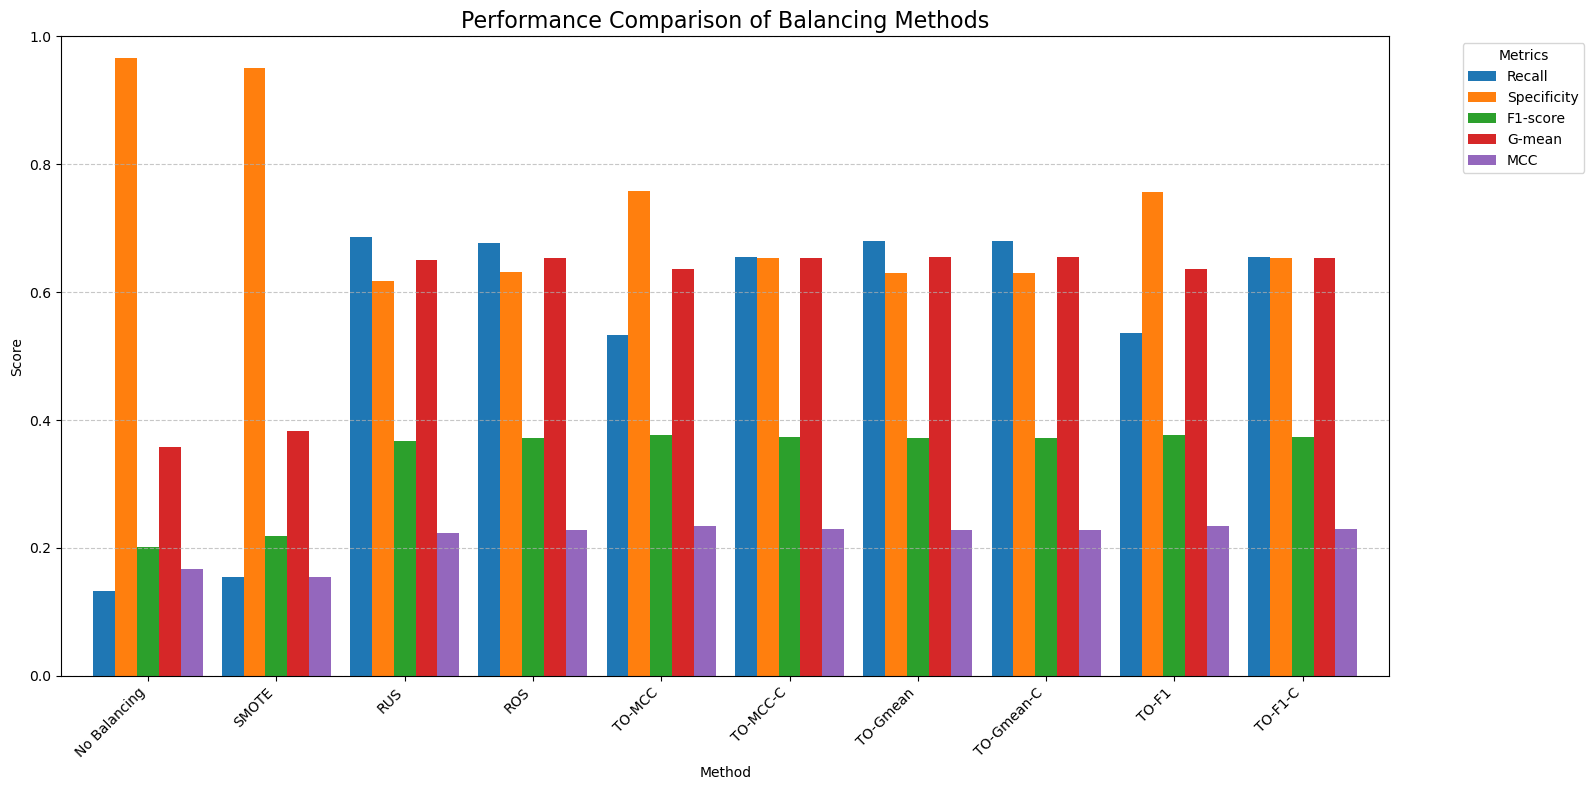

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    "Method": ["No Balancing", "SMOTE", "RUS", "ROS", "TO-MCC", "TO-MCC-C", "TO-Gmean", "TO-Gmean-C", "TO-F1", "TO-F1-C"],
    "Recall": [0.1325, 0.1545, 0.6859, 0.6775, 0.5324, 0.6555, 0.6794, 0.6794, 0.5354, 0.6544],
    "Specificity": [0.9666, 0.9509, 0.6179, 0.6316, 0.7585, 0.6527, 0.6301, 0.6301, 0.7563, 0.6535],
    "F1-score": [0.2021, 0.2181, 0.3677, 0.3713, 0.3770, 0.3731, 0.3714, 0.3714, 0.3771, 0.3731],
    "G-mean": [0.3579, 0.3833, 0.6510, 0.6541, 0.6355, 0.6541, 0.6543, 0.6543, 0.6363, 0.6540],
    "MCC": [0.1671, 0.1550, 0.2235, 0.2283, 0.2343, 0.2295, 0.2285, 0.2285, 0.2342, 0.2295]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Method", inplace=True)

# Plot
plt.figure(figsize=(14, 6))
df.plot(kind='bar', figsize=(16, 8), width=0.85)
plt.title("Performance Comparison of Balancing Methods", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Method")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the chart as PNG
plt.savefig("performance_comparison.png", dpi=300)

plt.show()

